# Data Preprocessing

## Note on Onehot Encoding

To prevent cluttering the database with several extra columns (and thus making it harder to maintain) the data will not be onehot encoded at this point. Instead onehot encoding will be applied to the dataset on demand by the ML service when requested.

This applies to the following columns:
 - AccidentType
 - Dominant injury
 - Vehicle Type
 - Weather Conditions
 - Accident Description
 - Injury Description
 - Gender

## Initial Data

In [2]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
claimData = pd.read_csv('dataset/OriginalClaimData.csv')

In [4]:
pd.set_option('display.max_columns', None)  
print(claimData.columns)
print(claimData)

Index(['SettlementValue', 'AccidentType', 'Injury_Prognosis',
       'SpecialHealthExpenses', 'SpecialReduction', 'SpecialOverage',
       'GeneralRest', 'SpecialAdditionalInjury', 'SpecialEarningsLoss',
       'SpecialUsageLoss', 'SpecialMedications', 'SpecialAssetDamage',
       'SpecialRehabilitation', 'SpecialFixes', 'GeneralFixed',
       'GeneralUplift', 'SpecialLoanerVehicle', 'SpecialTripCosts',
       'SpecialJourneyExpenses', 'SpecialTherapy', 'Exceptional_Circumstances',
       'Minor_Psychological_Injury', 'Dominant injury', 'Whiplash',
       'Vehicle Type', 'Weather Conditions', 'Accident Date', 'Claim Date',
       'Vehicle Age', 'Driver Age', 'Number of Passengers',
       'Accident Description', 'Injury Description', 'Police Report Filed',
       'Witness Present', 'Gender'],
      dtype='object')
      SettlementValue                             AccidentType  \
0              520.00                                 Rear end   
1              870.00                     

In [5]:
print(f"Dataset shape: {claimData.shape}")
claimData.info()
claimData.describe().T


Dataset shape: (5000, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   float64
 13  Special

,count,mean,std,min,25%,50%,75%,max
SettlementValue,4894.0,1218.010685,858.866309,240.0,669.14,988.0,1510.0,7862.90
SpecialHealthExpenses,4870.0,3.611704,85.047845,0.0,0.00,0.0,0.0,3024.00
SpecialReduction,4879.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00
SpecialOverage,4883.0,13.363580,84.223612,0.0,0.00,0.0,0.0,1250.00
GeneralRest,4872.0,463.305386,766.187669,0.0,0.00,0.0,906.0,3912.64
SpecialAdditionalInjury,4866.0,0.283580,12.988075,0.0,0.00,0.0,0.0,889.00
SpecialEarningsLoss,4872.0,52.191115,392.909130,0.0,0.00,0.0,0.0,7735.58
SpecialUsageLoss,4870.0,9.108830,65.505181,0.0,0.00,0.0,0.0,1050.00
SpecialMedications,4870.0,0.109698,1.389916,0.0,0.00,0.0,0.0,30.25
SpecialAssetDamage,4889.0,33.460761,282.692529,0.0,0.00,0.0,0.0,6070.00


In [6]:
missing_values = claimData.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
SettlementValue               106
AccidentType                  122
Injury_Prognosis              156
SpecialHealthExpenses         130
SpecialReduction              121
SpecialOverage                117
GeneralRest                   128
SpecialAdditionalInjury       134
SpecialEarningsLoss           128
SpecialUsageLoss              130
SpecialMedications            130
SpecialAssetDamage            111
SpecialRehabilitation         116
SpecialFixes                  121
GeneralFixed                  121
GeneralUplift                 137
SpecialLoanerVehicle          139
SpecialTripCosts              115
SpecialJourneyExpenses        147
SpecialTherapy                132
Exceptional_Circumstances     109
Minor_Psychological_Injury    119
Dominant injury               110
Whiplash                      130
Vehicle Type                  126
Weather Conditions            114
Accident Date                 138
Claim Date                    109
Vehicle Age         

In [7]:

# Identify categorical and numerical columns
categorical_cols = claimData.select_dtypes(include=['object', 'string']).columns.tolist()
numerical_cols = claimData.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from the feature lists
target_col = 'SettlementValue'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"Target column: {target_col}")



Categorical columns: ['AccidentType', 'Injury_Prognosis', 'Exceptional_Circumstances', 'Minor_Psychological_Injury', 'Dominant injury', 'Whiplash', 'Vehicle Type', 'Weather Conditions', 'Accident Date', 'Claim Date', 'Accident Description', 'Injury Description', 'Police Report Filed', 'Witness Present', 'Gender']
Numerical columns: ['SpecialHealthExpenses', 'SpecialReduction', 'SpecialOverage', 'GeneralRest', 'SpecialAdditionalInjury', 'SpecialEarningsLoss', 'SpecialUsageLoss', 'SpecialMedications', 'SpecialAssetDamage', 'SpecialRehabilitation', 'SpecialFixes', 'GeneralFixed', 'GeneralUplift', 'SpecialLoanerVehicle', 'SpecialTripCosts', 'SpecialJourneyExpenses', 'SpecialTherapy', 'Vehicle Age', 'Driver Age', 'Number of Passengers']
Target column: SettlementValue


## Handling Missing Data

### Removing Missing Values

Since the settlement value is what's being predicted, any row with a null settlement value is invalid

In [8]:
removableValueColumns = []
removableValueColumns.append('SettlementValue')

All values in injury prognosis have an associated letter code, since there is no provided letter code for missing/0 month prognoses there is no valid default value so any data rows with a missing prognosis is removed.

In [9]:
removableValueColumns.append('Injury_Prognosis')

Dates and ages dont have good default values so they're removed. For number of passengers, while 1 seems a sensible default, this isn't necessarily a valid inference and is therefore removed.

In [10]:
removableValueColumns.append('Accident Date')
removableValueColumns.append('Claim Date')
removableValueColumns.append('Number of Passengers')
removableValueColumns.append('Driver Age')
removableValueColumns.append('Vehicle Age')

In [11]:
for rowIndex, rowData in claimData.iterrows():
    for col in removableValueColumns:
        if pd.isna(rowData[col]):
            claimData.drop(index=rowIndex, inplace=True)
            break

In [12]:
claimData.reset_index(drop=True, inplace=True)    

print(claimData.isnull().any(axis = 1).sum())
print(len(claimData))

752
4297


### Replace Missing Values

The following columns all represent monetary values. A missing value is interpreted as no value and thus they are defaulted to 0.

In [13]:
defaultZeroColumns = ['SpecialHealthExpenses', 'SpecialReduction', 'SpecialOverage',
                      'GeneralRest', 'SpecialAdditionalInjury', 'SpecialEarningsLoss',
                      'SpecialUsageLoss', 'SpecialMedications', 'SpecialAssetDamage',
                      'SpecialRehabilitation', 'SpecialFixes', 'GeneralFixed',
                      'GeneralUplift', 'SpecialLoanerVehicle', 'SpecialTripCosts',
                      'SpecialJourneyExpenses', 'SpecialTherapy']

for rowIndex, rowData in claimData.iterrows():
    for col in defaultZeroColumns:
        if pd.isna(rowData[col]):
            claimData.at[rowIndex, col] = 0
            
print(claimData.isnull().any(axis = 1).sum())

429


The following columns are all boolean values. A missing value here is interpreted as false.

In [14]:
defaultNoColumns = ['Exceptional_Circumstances', 'Minor_Psychological_Injury', 'Whiplash', 'Police Report Filed', 'Witness Present']

for rowIndex, rowData in claimData.iterrows():
    for col in defaultNoColumns:
        if pd.isna(rowData[col]):
            claimData.at[rowIndex, col] = "No"

In [15]:
print(claimData.isnull().any(axis = 1).sum())

325


### Remaining Missing Values

Any missing values that haven't been handled so far are in columns that will later be one hot encoded at which point the missing value will no longer be an issue as it will instead be represented by a 0 across all relevant onehot columns.

## Duplicate Values

In [31]:
# No duplicated rows
duplicates = claimData[claimData.duplicated(keep=False)]  # Finds all duplicates
# print(duplicates)

settlementCount = claimData['SettlementValue'].value_counts()
print(settlementCount.head(10))

SettlementValue
520.0     304
895.0     198
260.0     146
495.0     142
240.0     119
840.0      63
1390.0     49
1020.0     26
795.0      21
950.0      20
Name: count, dtype: int64


£520 appears nearly twice as much as other most frequent values. We could maybe look at removing half these sample and how this affects our model.

## Data Visualization

In our dataset we have two protected characteristics:
- Age
- Gender

We can plot these columns to visualise how the data is distributed and if it is representative/ balanced.

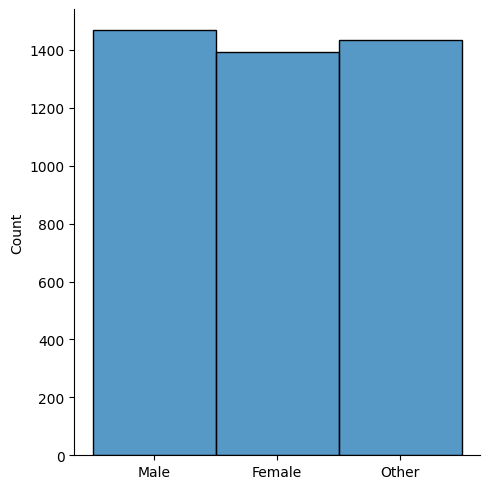

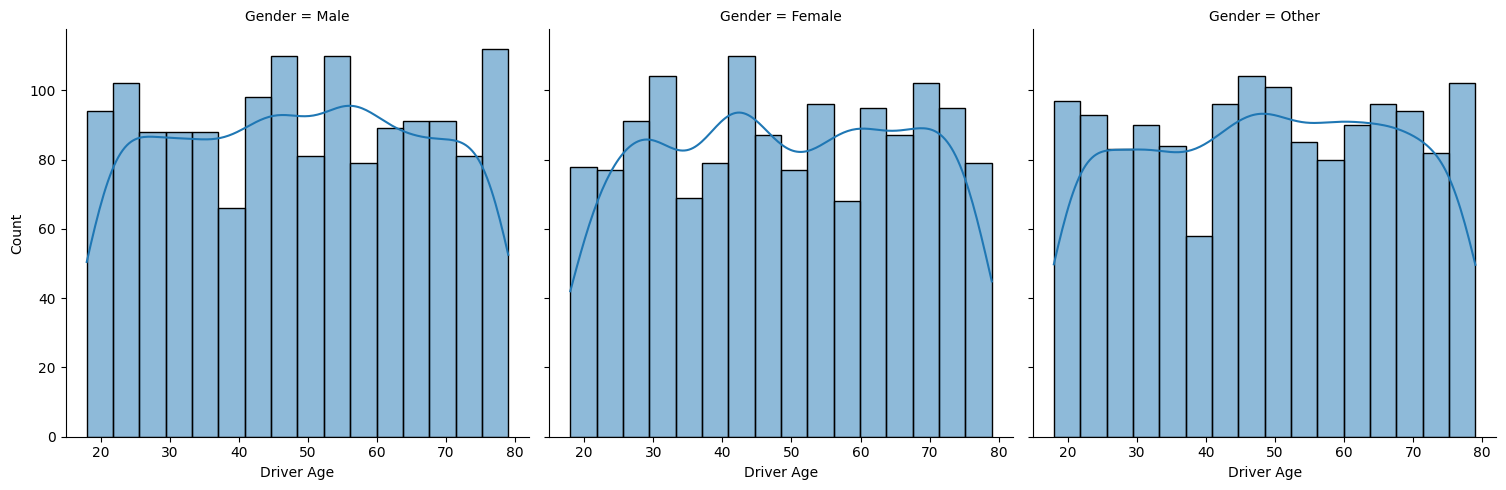

In [15]:
sns.displot(claimData['Gender'].to_numpy())
sns.displot(data=claimData, x="Driver Age", col="Gender", kde=True, col_wrap=4)

We have a good balance of sample size across gender. With only slightly more male than other categories.

We also have a good distribution of age representation within these groups.

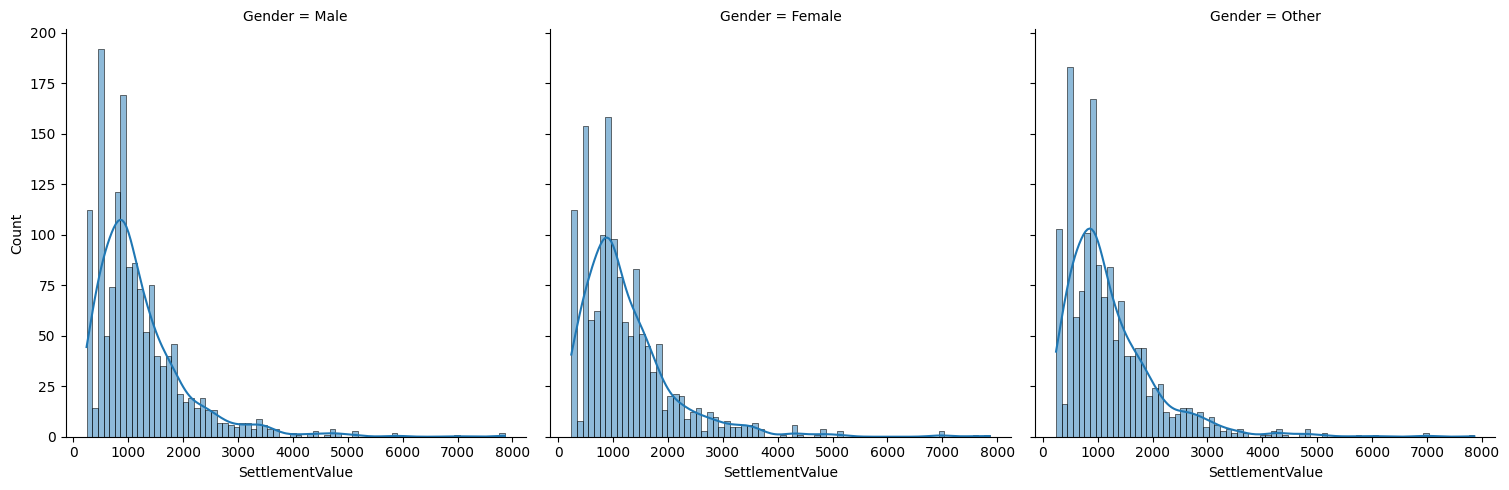

In [16]:
sns.displot(data=claimData, x="SettlementValue", col="Gender", kde=True, col_wrap=4)

Distribution of settlement value seems similar across all genders.

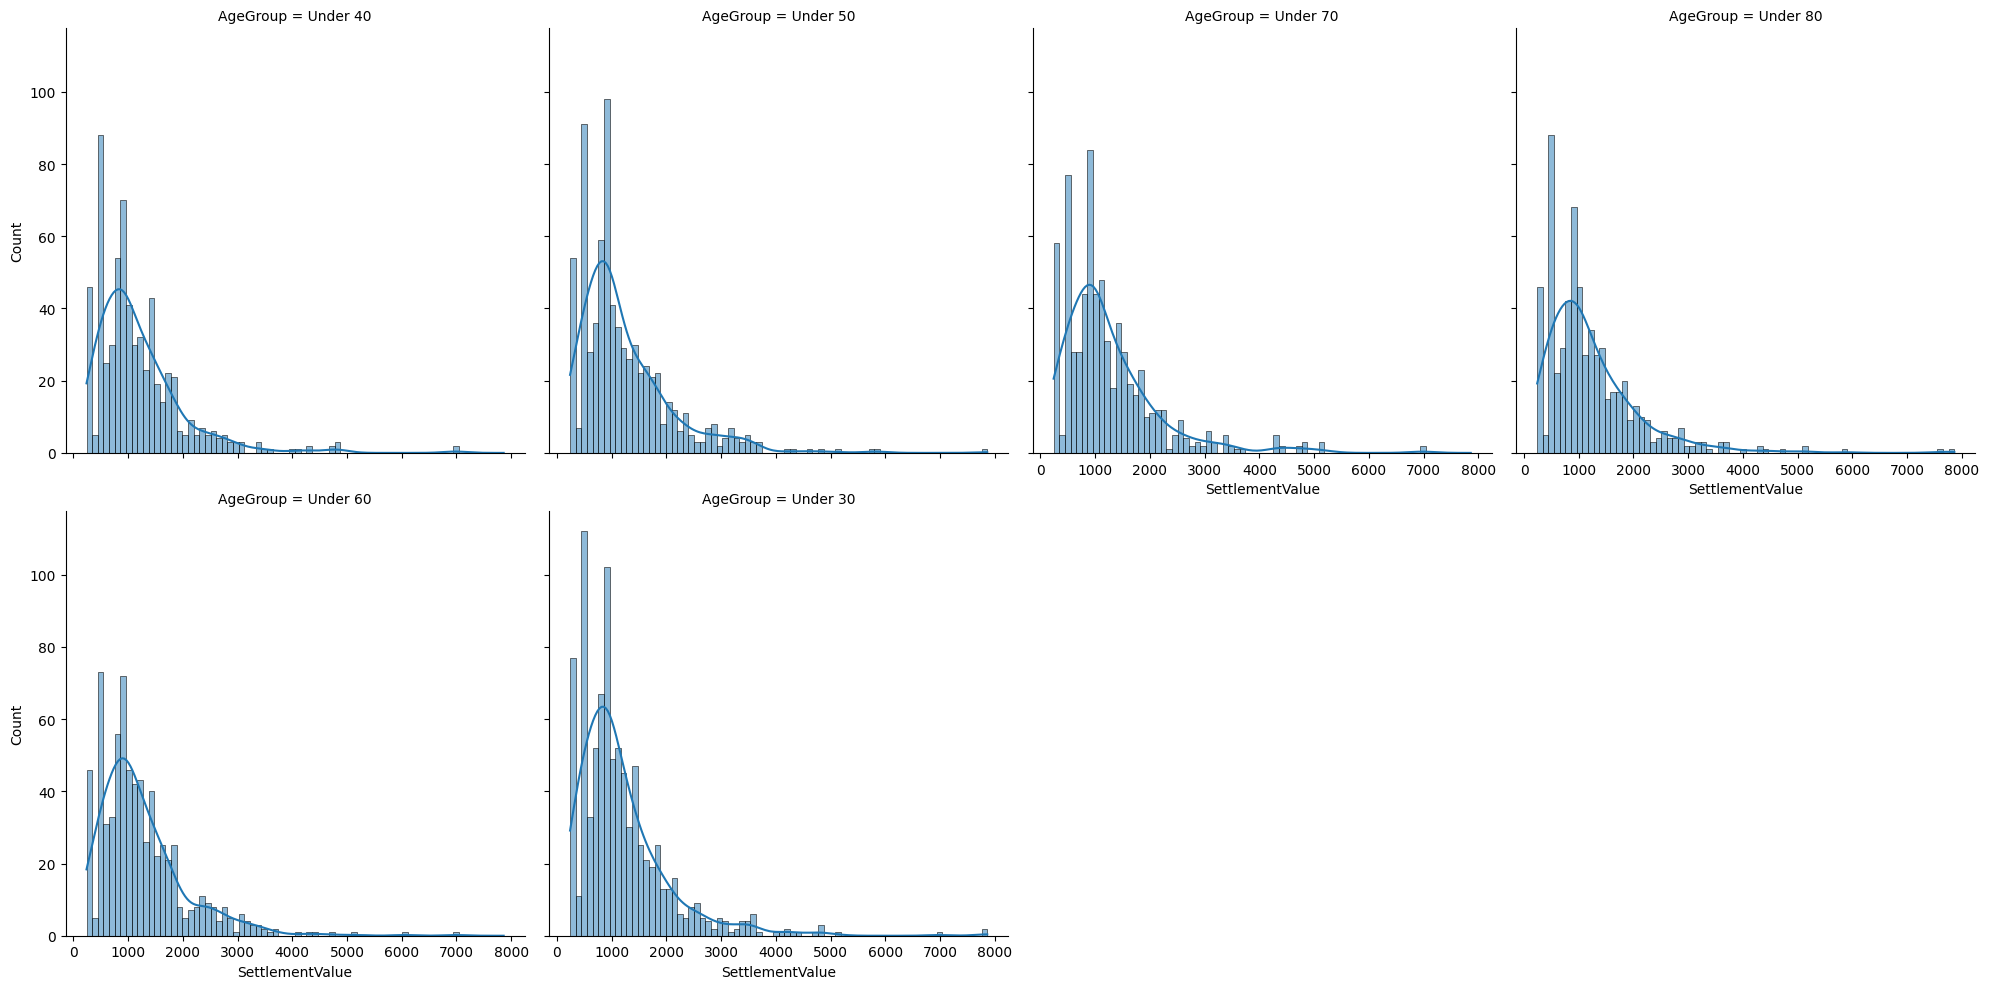

In [17]:
def age_group(age):
    if age <= 30:
        return "Under 30"
    if age <= 40:
        return "Under 40"
    if age <= 50:
        return "Under 50"
    if age <= 60:
        return "Under 60"
    if age <= 70:
        return "Under 70"
    if age <= 80:
        return "Under 80"
    
age_df = claimData[["Driver Age", "SettlementValue"]].copy()

age_df["AgeGroup"] = age_df['Driver Age'].apply(age_group)

sns.displot(data=age_df, x="SettlementValue", col="AgeGroup", kde=True, col_wrap=4)
        

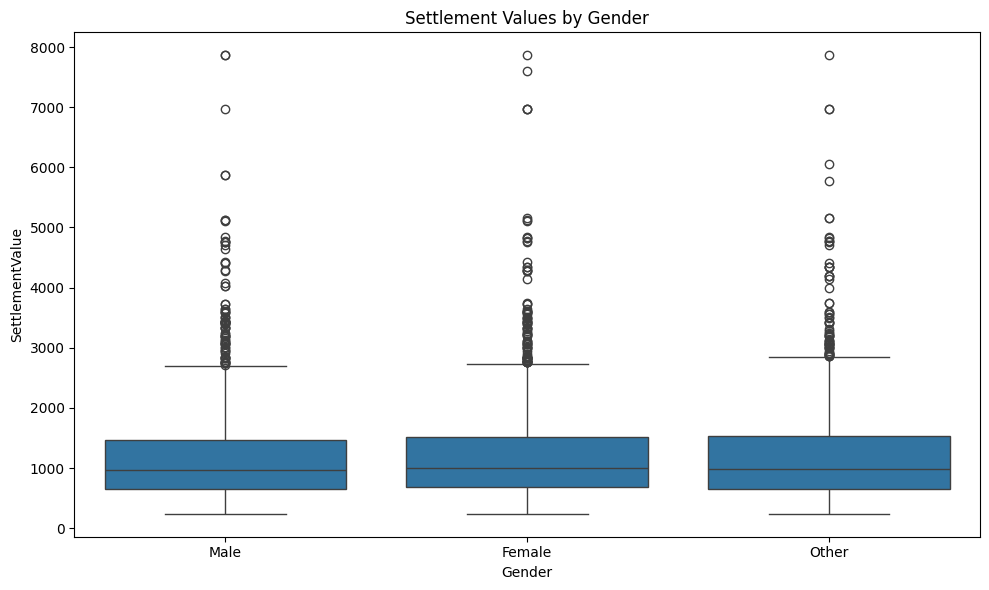

In [18]:
# Check for biases in settlement values by protected characteristics
if 'Gender' in claimData.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Gender', y=target_col, data=claimData)
    plt.title('Settlement Values by Gender')
    plt.tight_layout()
    plt.show()

In [19]:
if 'DriverAge' in claimData.columns:
    # Create age groups for visualization
    claimData['AgeGroup'] = pd.cut(claimData['DriverAge'], 
                                    bins=[0, 30, 40, 50, 60, 70, 80],
                                    labels=['Under 30', '30-40', '40-50', '50-60', '60-70', '70-80'])
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='AgeGroup', y=target_col, data=claimData)
    plt.title('Settlement Values by Age Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Above plots show settlement value by age groups. All have a very similar distribution.

Based on the above plots our dataset is balanced and representative in terms of protected characteristics. We can look at removing gender if it's not needed as it shouldn't have any bearing on our problem.

## Reducing Accuracy

Accident date and claim date are both recorded down to the millisecond which is far more accurate than is reasonably possible or necessary. Furthermore, since the time value for is identical across both fields it is likely that it was added automatically and/or by mistake.

In [20]:
for rowIndex, rowData in claimData.iterrows():
    # The date portion of the data is always the first 10 characters
    accidentDateOnly = rowData["Accident Date"][:10]
    claimDateOnly = rowData["Claim Date"][:10]
    
    claimData.at[rowIndex, "Accident Date"] = accidentDateOnly
    claimData.at[rowIndex, "Claim Date"] = claimDateOnly
    
print(claimData[["Accident Date", "Claim Date"]])

     Accident Date  Claim Date
0       2023-11-10  2024-06-11
1       2023-06-25  2024-01-09
2       2020-02-23  2020-03-01
3       2021-10-02  2021-10-13
4       2023-04-02  2023-04-14
...            ...         ...
4292    2022-09-14  2023-08-14
4293    2021-08-25  2022-06-30
4294    2023-03-09  2023-08-05
4295    2023-02-09  2023-10-18
4296    2020-04-09  2020-06-05

[4297 rows x 2 columns]


## Data Types

Currently the injury prognosis is stored as a string in the format "X months" and preceded by a letter code. The letter code and "months" text is completely unnecessary and thus are being removed and the field converted to an integer representing the prognosis in months.

In [21]:
i = 0
for cellData in claimData["Injury_Prognosis"]:
    months = int(''.join(c for c in cellData if c.isdigit()))
    claimData.at[i, "Injury_Prognosis"] = months
    i += 1
    
print(claimData["Injury_Prognosis"])

0        5
1        2
2        7
3        4
4        3
        ..
4292     4
4293     1
4294     6
4295     4
4296    11
Name: Injury_Prognosis, Length: 4297, dtype: object


There are several columns which only contain "Yes" or "No" and as such are better represented boolean or binary values.

In [22]:
binaryCols = defaultNoColumns

for col in binaryCols:
    i = 0
    for cellData in claimData[col]:
        val = 1 if cellData == "Yes" else 0
        claimData.at[i, col] = val
        i += 1
        
print(claimData[binaryCols])

     Exceptional_Circumstances Minor_Psychological_Injury Whiplash  \
0                            0                          1        1   
1                            0                          1        1   
2                            0                          0        1   
3                            0                          1        1   
4                            0                          1        0   
...                        ...                        ...      ...   
4292                         0                          1        0   
4293                         0                          1        0   
4294                         0                          1        0   
4295                         0                          1        0   
4296                         0                          1        1   

     Police Report Filed Witness Present  
0                      1               1  
1                      1               1  
2                      1      

In order for an AI to properly train on and understand a date, we need to convert it to a numerical value first, such as unix time or in our case (since we are using date only) julian date.

1. First converts the string dates to Julian format
2. Fixes the bug by using claimDate.year 
3. Calculates the difference to get days between dates

In [23]:
# for rowIndex, rowData in claimData.iterrows():
#     accidentDate = rowData["Accident Date"]
#     claimDate = rowData["Claim Date"]
    
#     accidentDate = datetime.datetime.strptime(accidentDate, '%Y-%m-%d')
#     accidentJulianDay = accidentDate.strftime('%j')
#     accidentJulianDate = int(f"{accidentDate.year}{accidentJulianDay}")
    
#     claimDate = datetime.datetime.strptime(claimDate, '%Y-%m-%d')
#     claimJulianDay = claimDate.strftime('%j')
#     claimJulianDate = int(f"{accidentDate.year}{claimJulianDay}")
    
#     claimData.at[rowIndex, "Accident Date"] = accidentJulianDate
#     claimData.at[rowIndex, "Claim Date"] = claimJulianDate
    
# print(claimData[["Accident Date", "Claim Date"]])

# Calculate days between accident and claim dates

for rowIndex, rowData in claimData.iterrows():
    accidentDate = rowData["Accident Date"]
    claimDate = rowData["Claim Date"]
    
    accidentDate = datetime.datetime.strptime(accidentDate, '%Y-%m-%d')
    accidentJulianDay = accidentDate.strftime('%j')
    accidentJulianDate = int(f"{accidentDate.year}{accidentJulianDay}")
    
    claimDate = datetime.datetime.strptime(claimDate, '%Y-%m-%d')
    claimJulianDay = claimDate.strftime('%j')

    claimJulianDate = int(f"{claimDate.year}{claimJulianDay}")
    
    claimData.at[rowIndex, "Accident Date"] = accidentJulianDate
    claimData.at[rowIndex, "Claim Date"] = claimJulianDate

claimData['DaysBetweenAccidentAndClaim'] = claimData["Claim Date"] - claimData["Accident Date"]


In [24]:
claimData.convert_dtypes().dtypes

SettlementValue                       Float64
AccidentType                   string[python]
Injury_Prognosis                        Int64
SpecialHealthExpenses                   Int64
SpecialReduction                        Int64
SpecialOverage                        Float64
GeneralRest                           Float64
SpecialAdditionalInjury               Float64
SpecialEarningsLoss                   Float64
SpecialUsageLoss                        Int64
SpecialMedications                    Float64
SpecialAssetDamage                    Float64
SpecialRehabilitation                 Float64
SpecialFixes                          Float64
GeneralFixed                            Int64
GeneralUplift                         Float64
SpecialLoanerVehicle                  Float64
SpecialTripCosts                      Float64
SpecialJourneyExpenses                Float64
SpecialTherapy                        Float64
Exceptional_Circumstances               Int64
Minor_Psychological_Injury        

## Skewness

Checking for possible skewness in the dataset. This plots how often the settlement values were awarded. 

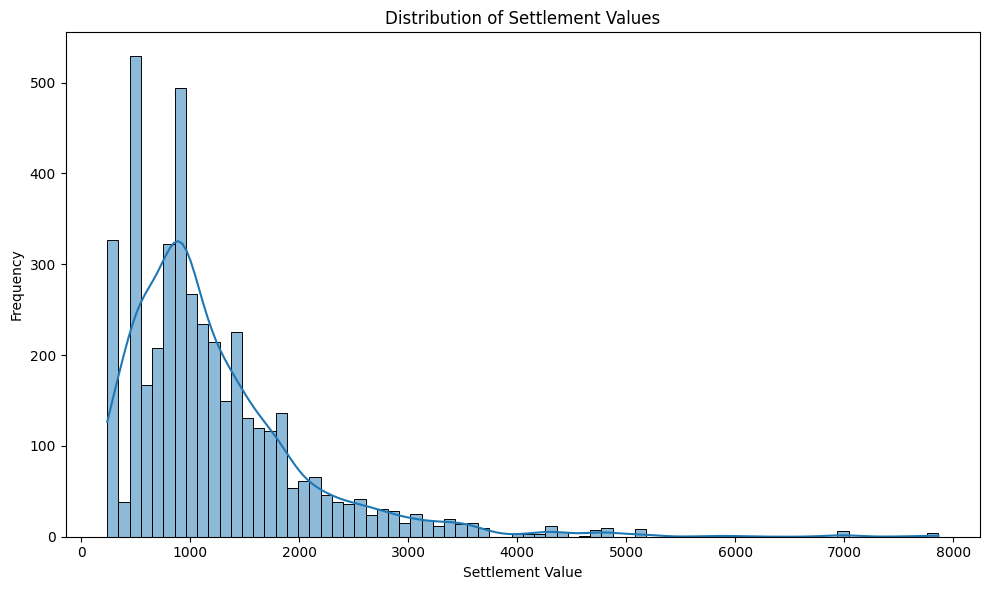

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(claimData[target_col], kde=True)
plt.title('Distribution of Settlement Values')
plt.xlabel('Settlement Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
skewness = claimData[target_col].skew()
print(f"Skewness of target variable: {skewness}")

Skewness of target variable: 2.3474856895472485


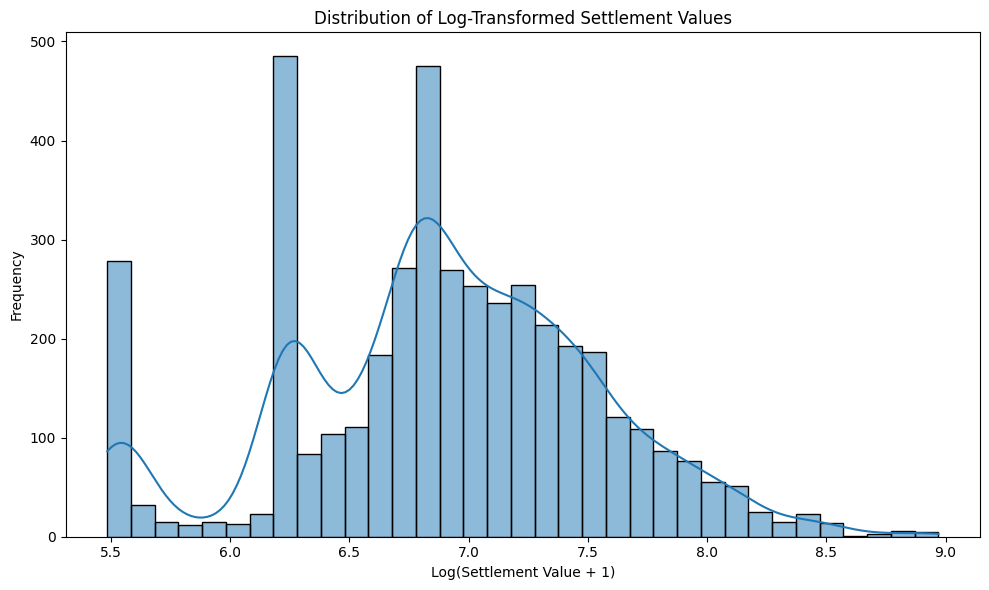

In [27]:

claimData['LogSettlementValue'] = np.log1p(claimData[target_col])
plt.figure(figsize=(10, 6))
sns.histplot(claimData['LogSettlementValue'], kde=True)
plt.title('Distribution of Log-Transformed Settlement Values')
plt.xlabel('Log(Settlement Value + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Update target column for log-transformed version
log_transform = True
target_col = 'LogSettlementValue'

With the skewness being above 1, log transformation was used to make it more even. This would mean the data will need to be transformed before inferencing. 

## Correlation Matrix

In [28]:
if 'DriverAge' in claimData.columns:
    # Create age groups for visualization
    claimData['AgeGroup'] = pd.cut(claimData['DriverAge'], 
                                    bins=[0, 30, 40, 50, 60, 70, 80],
                                    labels=['Under 30', '30-40', '40-50', '50-60', '60-70', '70-80'])
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='AgeGroup', y=target_col, data=claimData)
    plt.title('Settlement Values by Age Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


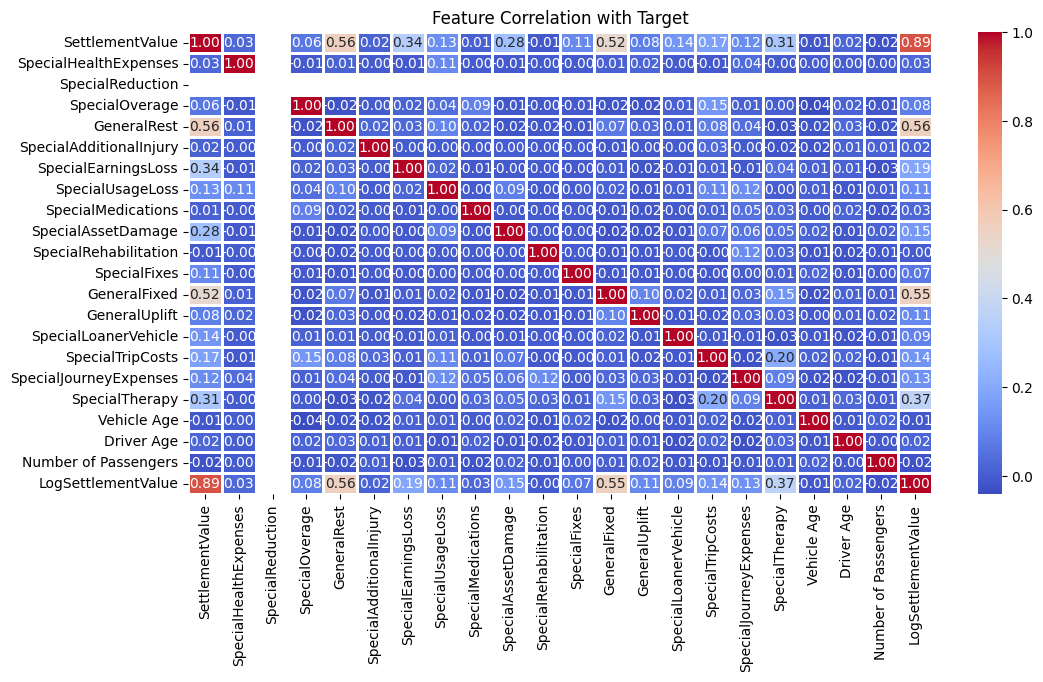

In [29]:
corr_matrix = claimData.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Feature Correlation with Target")
plt.show()

In [30]:
# top correlations with target
target_correlations = corr_matrix[target_col].sort_values(ascending=False)
print("\nTop 10 features correlated with settlement value:")
print(target_correlations[:10])



Top 10 features correlated with settlement value:
LogSettlementValue        1.000000
SettlementValue           0.894572
GeneralRest               0.560519
GeneralFixed              0.551279
SpecialTherapy            0.368660
SpecialEarningsLoss       0.192902
SpecialAssetDamage        0.154347
SpecialTripCosts          0.141347
SpecialJourneyExpenses    0.133370
SpecialUsageLoss          0.114796
Name: LogSettlementValue, dtype: float64


## Column Names

Column names in the dataset use varying naming conventions including PascalCase, Snake_Case and some are simply written with spaces. The database being used has all column names in PascalCase so for clarity and consistency all columns in the dataset will be converted. 

In [31]:
columnRenameDict = {
    "Injury_Prognosis":"InjuryPrognosis",
    "Exceptional_Circumstances":"ExceptionalCircumstances",
    "Minor_Psychological_Injury":"MinorPsychologicalInjury",
    "Dominant injury":"DominantInjury",
    "Vehicle Type":"VehicleType",
    "Weather Conditions":"WeatherConditions",
    "Accident Date":"AccidentDate",
    "Claim Date":"ClaimDate",
    "Vehicle Age":"VehicleAge",
    "Driver Age":"DriverAge",
    "Number of Passengers":"NumberOfPassengers",
    "Accident Description":"AccidentDescription",
    "Injury Description":"InjuryDescription",
    "Police Report Filed":"PoliceReportFiled",
    "Witness Present":"WitnessPresent"
}

claimData = claimData.rename(columns=columnRenameDict)
print(claimData.columns)

Index(['SettlementValue', 'AccidentType', 'InjuryPrognosis',
       'SpecialHealthExpenses', 'SpecialReduction', 'SpecialOverage',
       'GeneralRest', 'SpecialAdditionalInjury', 'SpecialEarningsLoss',
       'SpecialUsageLoss', 'SpecialMedications', 'SpecialAssetDamage',
       'SpecialRehabilitation', 'SpecialFixes', 'GeneralFixed',
       'GeneralUplift', 'SpecialLoanerVehicle', 'SpecialTripCosts',
       'SpecialJourneyExpenses', 'SpecialTherapy', 'ExceptionalCircumstances',
       'MinorPsychologicalInjury', 'DominantInjury', 'Whiplash', 'VehicleType',
       'WeatherConditions', 'AccidentDate', 'ClaimDate', 'VehicleAge',
       'DriverAge', 'NumberOfPassengers', 'AccidentDescription',
       'InjuryDescription', 'PoliceReportFiled', 'WitnessPresent', 'Gender',
       'DaysBetweenAccidentAndClaim', 'LogSettlementValue'],
      dtype='object')


In [32]:
claimData.to_csv('ProcessedClaimData.csv', index=False)